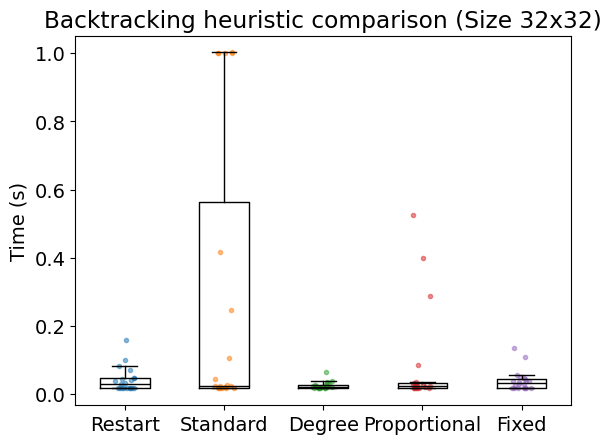

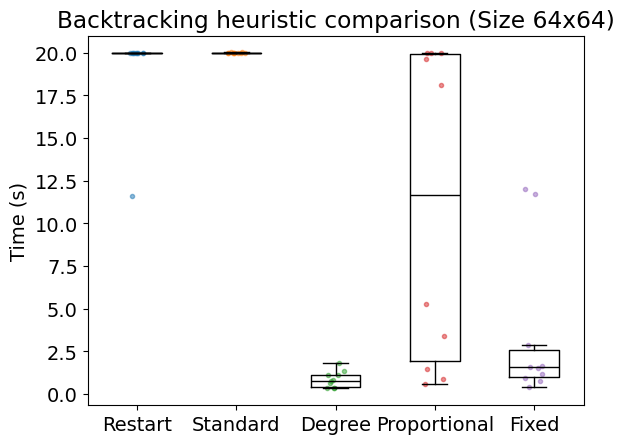

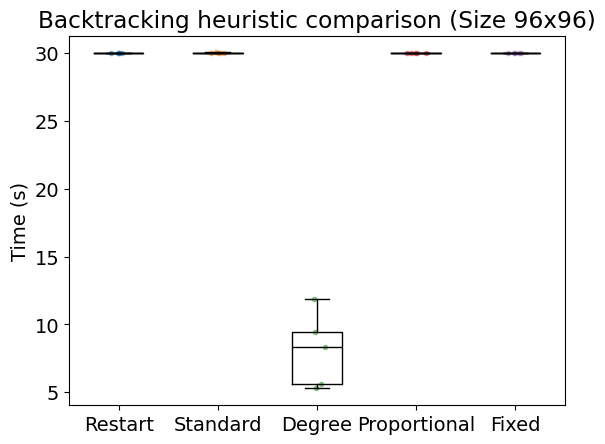

In [76]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

max_time = {}
data = np.genfromtxt("data/backtracking.csv", delimiter=",", dtype=str)
times = {}
for i in range(1, len(data)):
    size = data[i][1]
    heuristic = data[i][2]
    time = float(data[i][3])
    label = ""

    if size not in times:
        times[size] = {}
        max_time[size] = 0

    if np.isnan(time):
        label = "Didn't finish"
    else:
        max_time[size] = np.maximum(max_time[size], time)

    if heuristic not in times[size]:
        times[size][heuristic] = [[], label]

    times[size][heuristic][0].append(time)

sizes = times.keys()
for size in sizes:
    labels = [heuristic for heuristic in times[size].keys()]
    y = [times[size][heuristic][0] for heuristic in labels]

    plt.rc('font', size=14)

    fig, ax = plt.subplots()
    # fig.set_size_inches(3, 2, forward=True)

    for i, y_single in enumerate(y):
        ax.plot(np.array([i+1] * len(y_single)) -0.1 + 0.2 *np.random.random( size=len(y_single)), y_single, '.', alpha=0.8)
    for median in ax.boxplot(y, showfliers=False)['medians']:
        median.set_color('k')

    ax.set_xticklabels(times[size].keys())
    ax.set_ylabel("Time (s)")
    # plt.tight_layout()

    plt.title("Backtracking heuristic comparison for size {}x{}".format(size, size))
    plt.savefig(f"output/backtracking-{size}.pdf")
    plt.show()
